In [1]:
import numpy as np
import helper_utils

In [2]:
helper_utils.list_available_tracks()

['reInvent2019_track', '2022_august_open', 'Canada_Training', 'canada_race', 'Tokyo_Training_track', 'Oval_track', 'New_York_Track', 'Bowtie_track', 'H_track', 'reinvent_base', '2022_september_open', 'Mexico_track', 'Virtual_May19_Train_track', 'Straight_track', 'AWS_track', 'China_track', '2022_july_open', '2022_june_open', 'London_Loop_Train']


In [3]:
TRACK_NAME = "2022_september_open"
center_line, inner_border, outer_border = helper_utils.load_track_waypoints(TRACK_NAME)

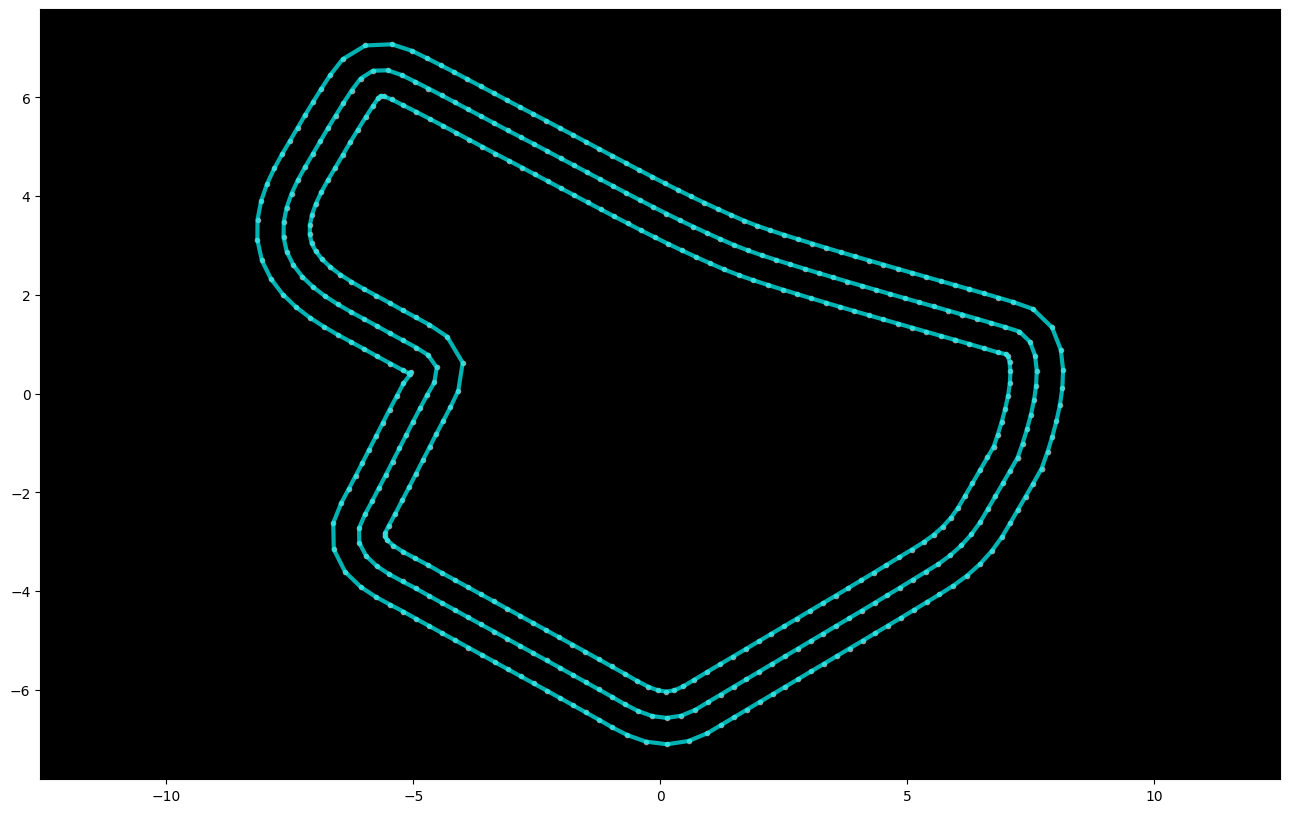

In [4]:
helper_utils.plot_track(center_line, inner_border, outer_border)

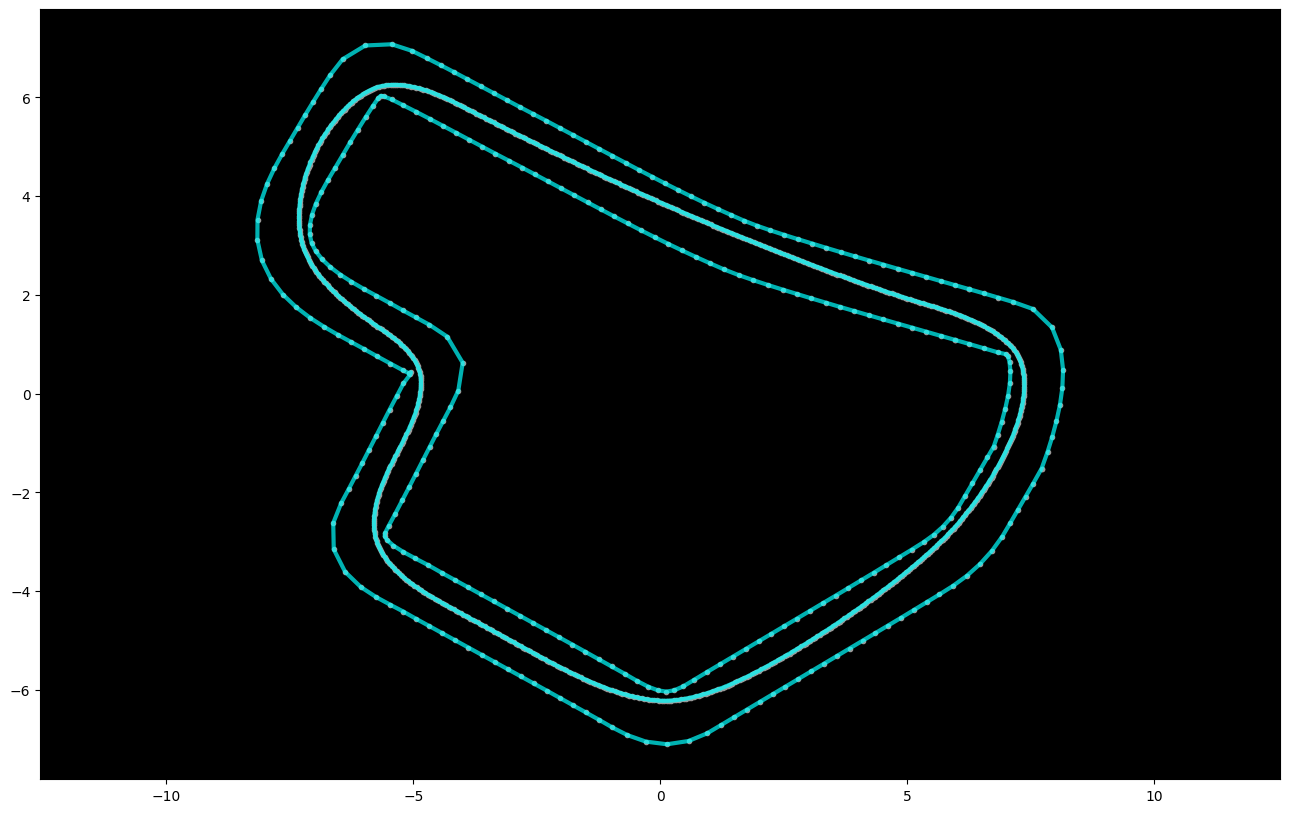

In [5]:
racing_line = helper_utils.load_py_to_ndarray('./racelines-populated/2022_september_open-cubspl-5.47-2022-12-25-210410.py')
helper_utils.plot_track(racing_line, inner_border, outer_border)

In [6]:
npoints = len(racing_line) - 1

In [7]:
track_curvatures = helper_utils.load_py_to_ndarray('./track-curvatures/2022_september_open-2022-12-28-002455.py')
len(track_curvatures)

824

In [8]:
MAX_STEERING = 15
MAX_RADIUS = 10
THIRD_POINT_X = 2.25
THIRD_POINT_Y = 6

b = (THIRD_POINT_X * THIRD_POINT_Y * MAX_RADIUS) / (MAX_STEERING * THIRD_POINT_X - MAX_STEERING * MAX_RADIUS + THIRD_POINT_Y * MAX_RADIUS)
a = (MAX_STEERING * b * (b - MAX_RADIUS)) / MAX_RADIUS
c = a/b + MAX_STEERING

optimal_steering = (a / (np.abs(track_curvatures) - b)) + c
optimal_steering *= (track_curvatures / np.abs(track_curvatures))
optimal_steering[np.isclose(optimal_steering, 0)] = 0
optimal_steering

array([  2.65983358,   0.92327297,   0.87962044,   0.70676434,
         0.67022978,   0.52560928,   0.46931324,   0.29815885,
         0.18522254,   0.07826093,   0.15085705,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.  

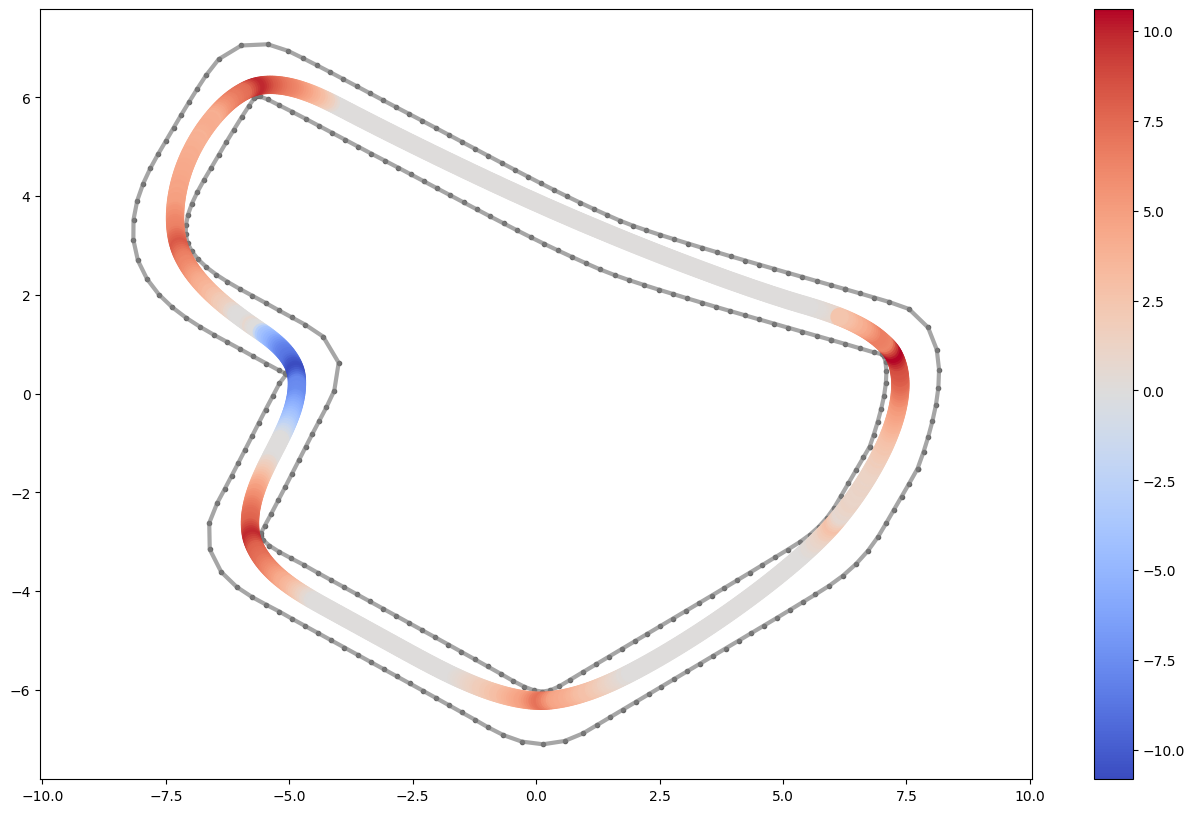

In [9]:
MAX_CURVATURE = 10

fig = helper_utils.plot_border(inner_border, outer_border)
scatter = fig.gca().scatter(
    racing_line[:npoints, 0], racing_line[:npoints, 1], s=150,
    c=optimal_steering, cmap='coolwarm', zorder=3
)
fig.colorbar(scatter)

In [10]:
from datetime import datetime

now = datetime.now()
prefix = './steering-angles/%s-S%d-R%d-X%.2f-Y%d-%s' % (TRACK_NAME, MAX_STEERING, MAX_RADIUS, THIRD_POINT_X, THIRD_POINT_Y, now.strftime('%Y-%m-%d-%H%M%S'))
arr_repr = helper_utils.array1D_repr_columns(optimal_steering, 14)
helper_utils.export_ndarray(optimal_steering, prefix, arr_repr)

Writing python code to ./steering-angles/2022_september_open-S15-R10-X2.25-Y6-2022-12-28-005427.py
Writing numpy binary to ./steering-angles/2022_september_open-S15-R10-X2.25-Y6-2022-12-28-005427.npy
